In [89]:
import random
from functools import reduce
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Let's start with the 2 piece case. The largest product is when $d_1=d_2=5$

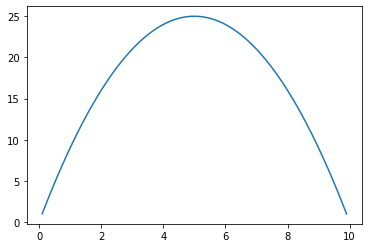

In [137]:
x=np.arange(0.1, 10, 0.1)
plt.plot(x, x * (10-x))
plt.show()

Similarly, let's check the 3 piece case. The largest product is when:

$d_1 = d_2 = d_3 = \frac{10}{3} = 3\frac{1}{3}$

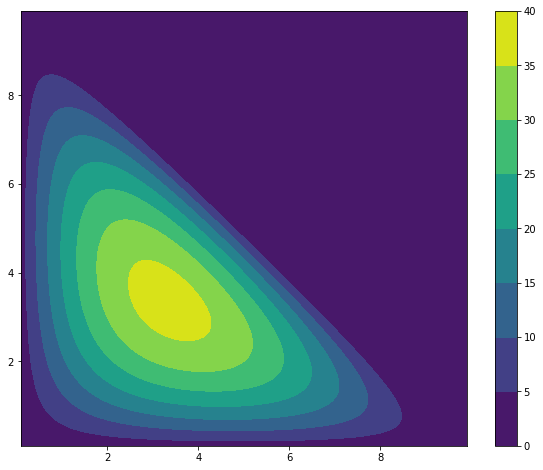

In [133]:
fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(0.1, 10, 0.1)
y = np.arange(0.1, 10, 0.1)
xv, yv = np.meshgrid(x, y, sparse=True)
z = xv * yv * (10-xv-yv)
cs = ax.contourf(x, y, np.where(z > 0, z, 0))
fig.colorbar(cs)
plt.show()

In [134]:
dmax={'n': [], 'volume': []} 
for i in range(2,11):
    dmax['n'].append(i)
    dmax['volume'].append((10/i)**i)
dfmax=pd.DataFrame(dmax)
dfmax

,n,volume
0,2,25.000000
1,3,37.037037
2,4,39.062500
3,5,32.000000
4,6,21.433471
5,7,12.142657
6,8,5.960464
7,9,2.581175
8,10,1.000000


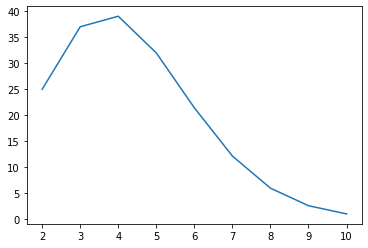

In [139]:
plt.plot(dfmax['n'], dfmax['volume'])
plt.show()

In [13]:
[random.uniform(0, 10)] * 3

[6.719450575661688, 6.719450575661688, 6.719450575661688]

In [29]:
d=[0]
d.extend(sorted([random.uniform(0, 10) for x in range(3)]))
d.append(10)
d

[0, 5.413230813278704, 6.7002091347821, 7.592802485943901, 10]

In [33]:
[d[i+1]-d[i] for i in range(len(d)-1)]

[5.413230813278704, 1.2869783215033959, 0.8925933511618007, 2.407197514056099]

In [34]:
def random_fragments(n, total=10):
    d=[0]
    d.extend(sorted([random.uniform(0, total) for x in range(n-1)]))
    d.append(total)
    return [d[i+1]-d[i] for i in range(len(d)-1)]

In [36]:
random_fragments(4)

[3.7435565965260595, 4.011075797386563, 0.5393884252938506, 1.705979180793527]

In [86]:
data={"i":[], "n":[], "lengths":[], "volume":[]}
for n in range(2,11):
    for i in range(5000):
        data["i"].append(i)
        data["n"].append(n)
        t=random_fragments(n)
        data["lengths"].append(t)
        data["volume"].append(reduce(lambda a, b: a * b, t))
df=pd.DataFrame(data)

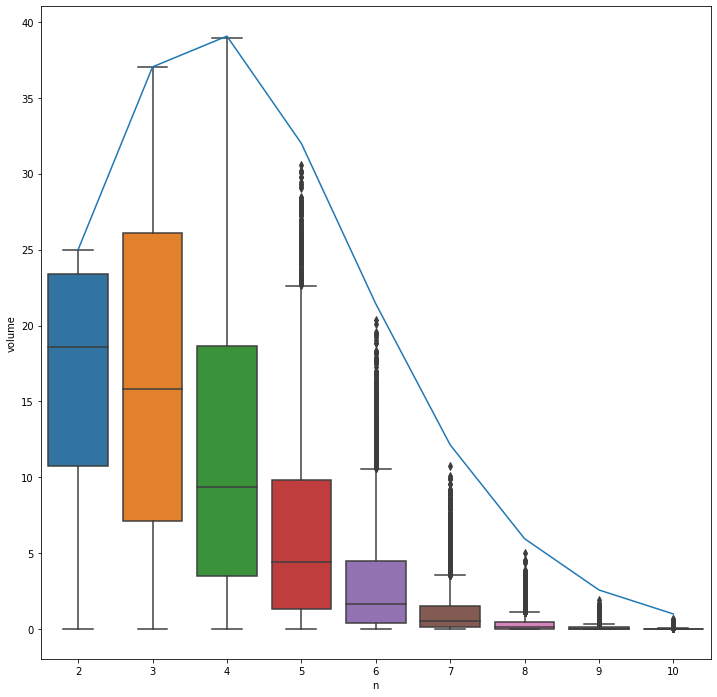

In [136]:
f, ax = plt.subplots(figsize=(12,12))

sns.boxplot(x="n", y="volume", data=df, ax=ax)
ax.plot(dfmax['n']-2, dfmax['volume'])
plt.show()